## Project Overview

# Sugarcane Production Data Analysis Project

**Objective:**  
Analyze factors affecting sugarcane production by exploring trends in the data, visualizing relationships, and building a predictive model.

**Steps:**
1. Load and explore the data
2. Clean and preprocess the data
3. Conduct exploratory data analysis (EDA)
4. Draw conclusions and insights



In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

1. Loading the Dataset 


In [3]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [4]:
# Display the first few rows to inspect the data
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


2. Data Exploration
   
     

In [5]:
print("Dataset Dimensions:", df.shape)
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
df.describe()

Dataset Dimensions: (103, 7)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB

Summary Statistics:


,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


3. DATA CLEANING :
      

In [6]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.rename(columns={"Production (Tons)" : "Production(Tons)"},inplace = True)
df.rename(columns={"Production per Person (Kg)" : "Production_per_person(Kg)"},inplace = True)
df.rename(columns={"Acreage (Hectare)" : "Acreage(Hectare)"},inplace = True)
df.rename(columns={"Yield (Kg / Hectare)" : "Yield(Kg/Hectare)"},inplace = True)

In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df = df.dropna().reset_index()

In [13]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [16]:
print("\nAfter cleaning, missing values:")
print(df.isnull().sum())


After cleaning, missing values:
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64


In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [17]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [21]:
# Convert columns to float to ensure proper numeric operations
df["Production(Tons)"]  = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"]  = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)


In [22]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [23]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

4. Exploratory Data Analysis (EDA):
   

UNIVARIATE ANALYSIS

1. How many countries produce sugarcane from each continents?

In [220]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

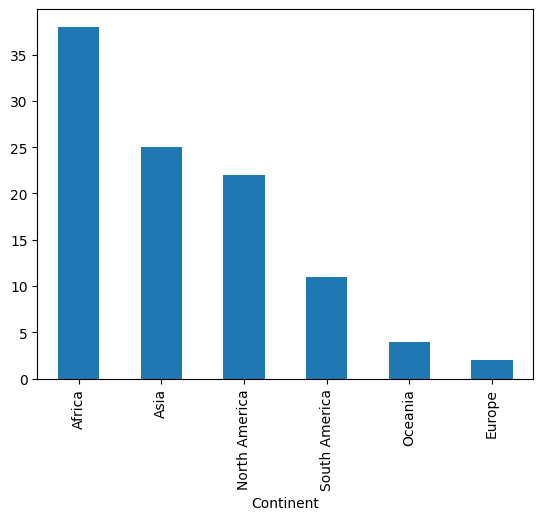

In [221]:
df["Continent"].value_counts().plot(kind = "bar")

DISTRIBUTION CHART

C:\Users\sande\AppData\Local\Temp\ipykernel_16096\1574282873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\sande\AppData\Local\Temp\ipykernel_16096\1574282873.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\sand

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

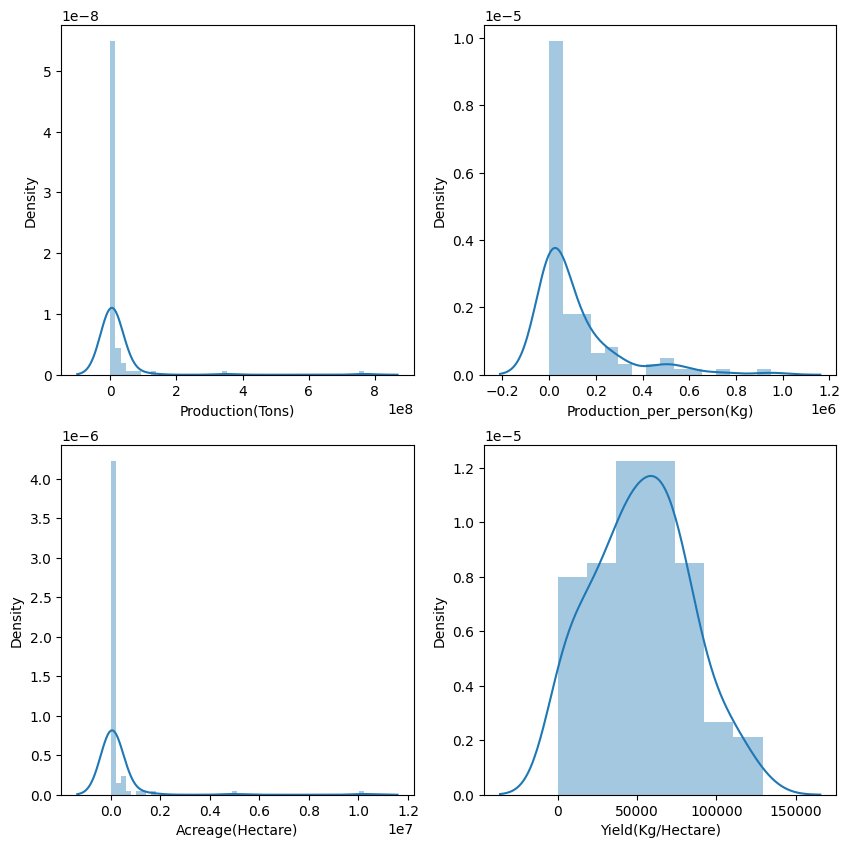

In [222]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

OUTLIER Detection

<Axes: ylabel='Yield(Kg/Hectare)'>

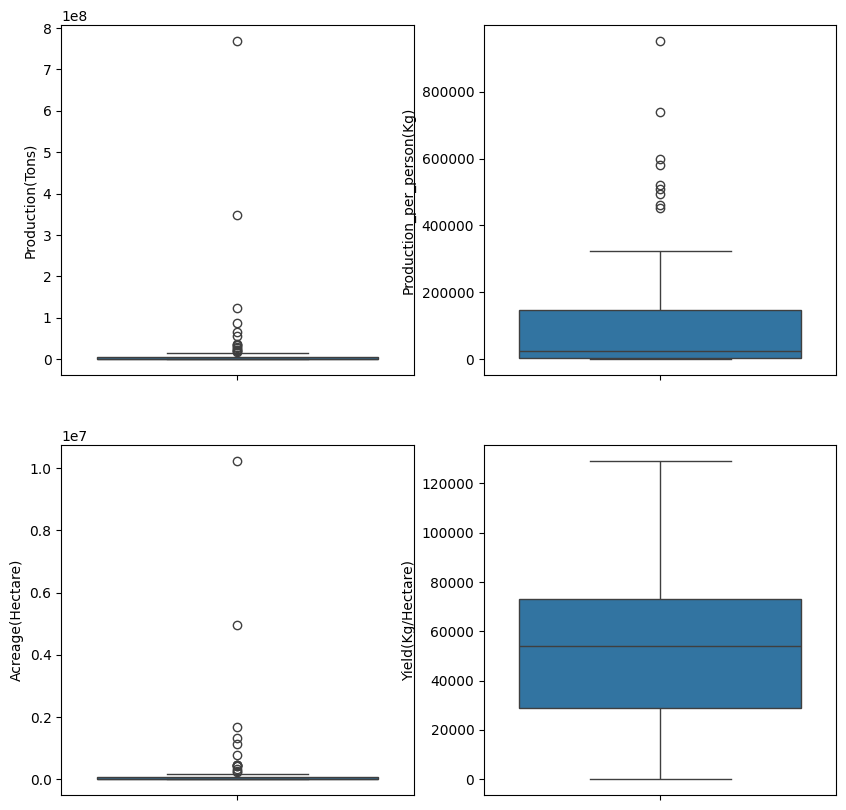

In [223]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [224]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


BIVARIATE ANALYSIS

1. Which country produces maximum sugarcane 

In [225]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [226]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [227]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

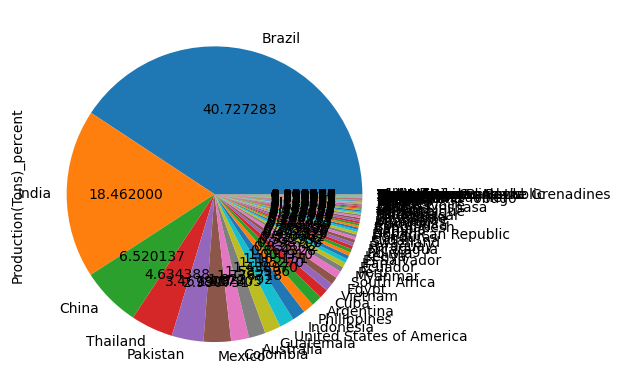

In [228]:
df_new["Production(Tons)_percent"].plot(kind = "pie",autopct ="%2f")

<Axes: xlabel='Country'>

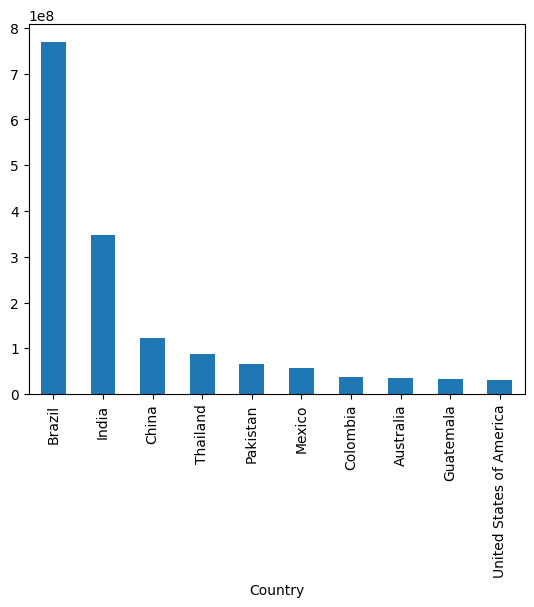

In [229]:
df_new["Production(Tons)"].head(10).plot(kind="bar") 

C:\Users\sande\AppData\Local\Temp\ipykernel_16096\2720008549.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


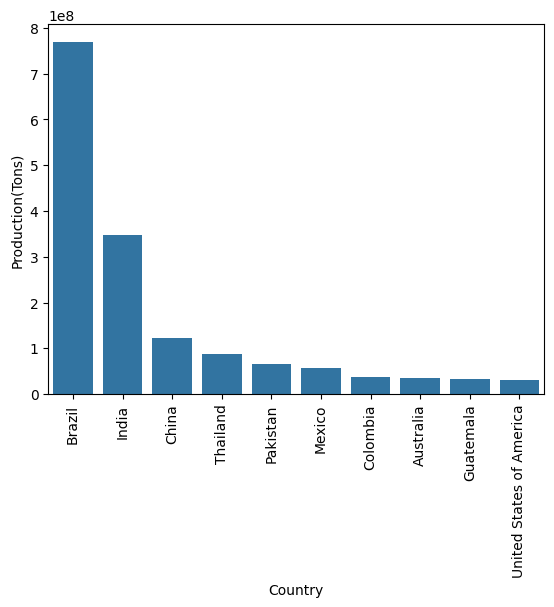

In [230]:
ax = sns.barplot(data = df.head(10), x = "Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Which country as the highest land?1

C:\Users\sande\AppData\Local\Temp\ipykernel_16096\1490837914.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


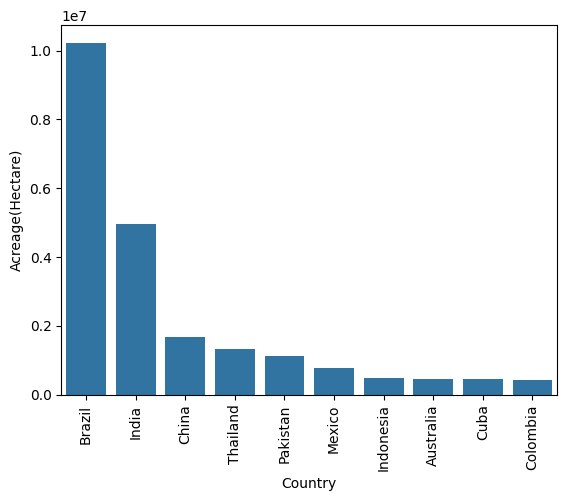

In [231]:
df_acr = df.sort_values("Acreage(Hectare)",ascending = False)
ax = sns.barplot(data = df_acr.head(10), x = "Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Which  country has highest yield per hectare?

C:\Users\sande\AppData\Local\Temp\ipykernel_16096\3760427890.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


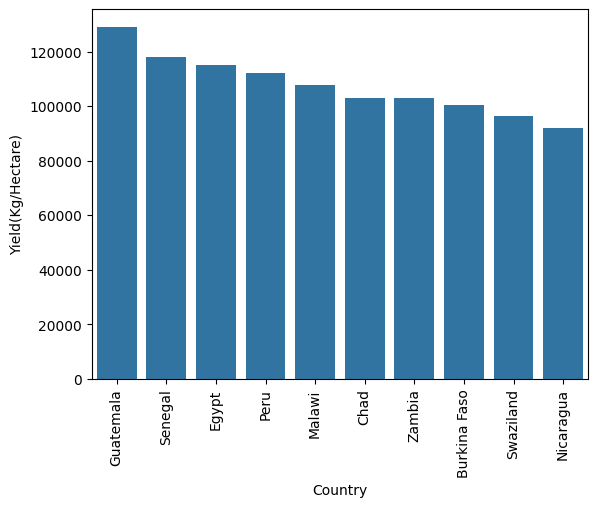

In [232]:
df_yield = df.sort_values("Yield(Kg/Hectare)",ascending = False)
ax = sns.barplot(data = df_yield.head(10), x = "Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Which country has highest production?

C:\Users\sande\AppData\Local\Temp\ipykernel_16096\2517723178.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


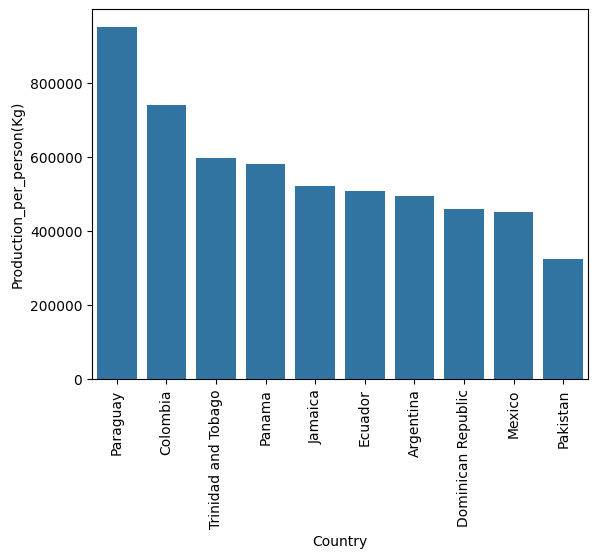

In [233]:
df_prod= df.sort_values("Production_per_person(Kg)",ascending = False)
ax = sns.barplot(data = df_prod.head(10), x = "Country",y="Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Correlation

In [234]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
correlation_matrix

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

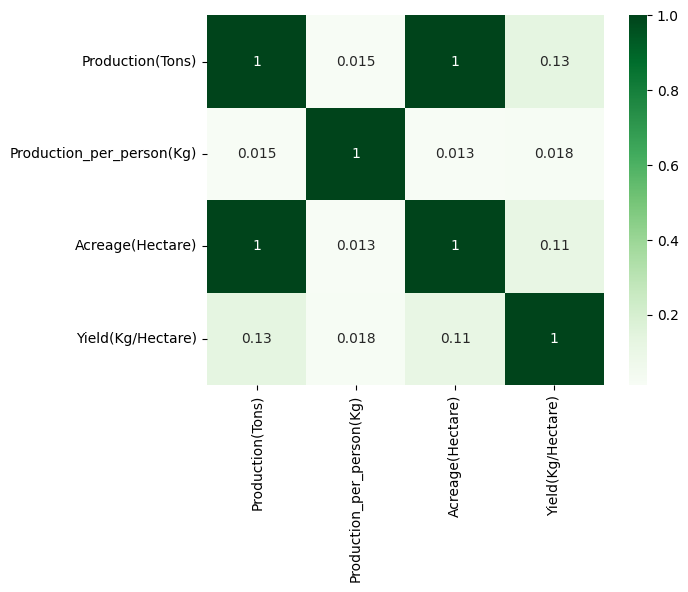

In [235]:
sns.heatmap(correlation_matrix,annot=True,cmap='Greens')

Do countries with highest land produce more sugar?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

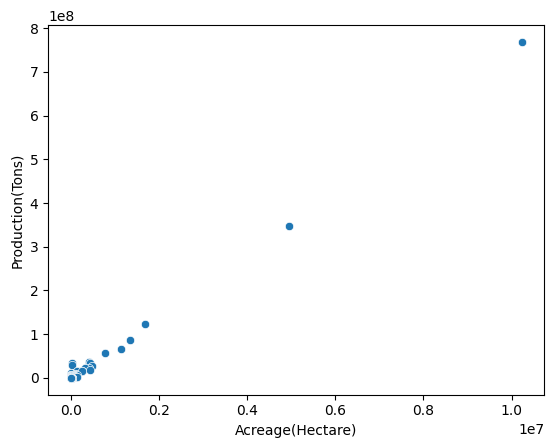

In [236]:
sns.scatterplot(data = df,x="Acreage(Hectare)",y="Production(Tons)")

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

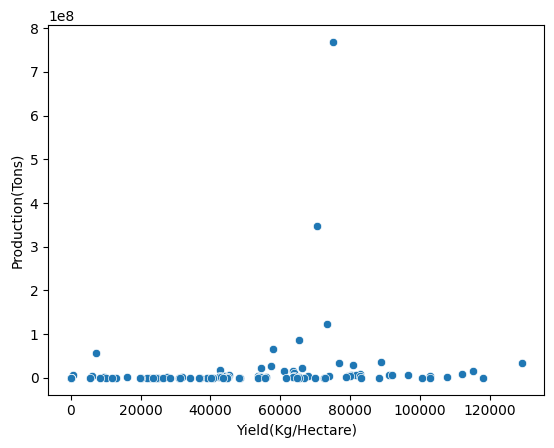

In [237]:
sns.scatterplot(data = df,x="Yield(Kg/Hectare)",y="Production(Tons)")

Analysis for Continent

In [238]:
df_continent = df.groupby("Continent").sum()
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


1. Which continent produces maximum sugar

<Axes: xlabel='Continent'>

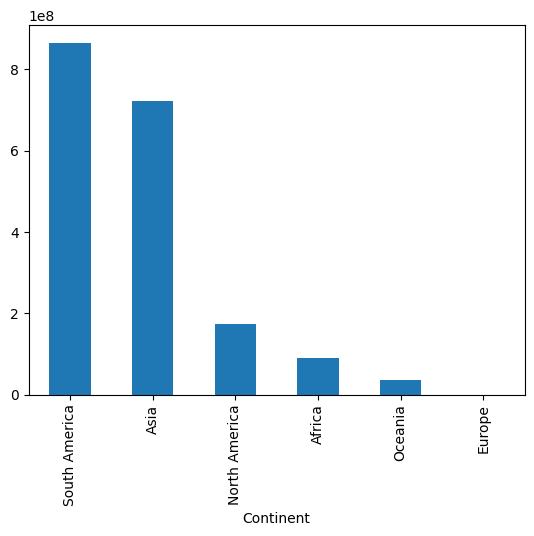

In [239]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

2. Which continent has higest land ?

<Axes: xlabel='Continent'>

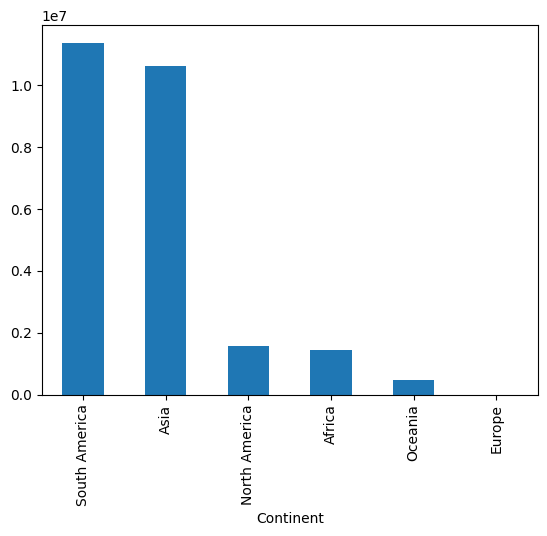

In [240]:
df_continent["Acreage(Hectare)"].sort_values(ascending=False).plot(kind="bar")

3. Do number of countries in a continent affects productions of sugarcane?

In [241]:
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]

In [242]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


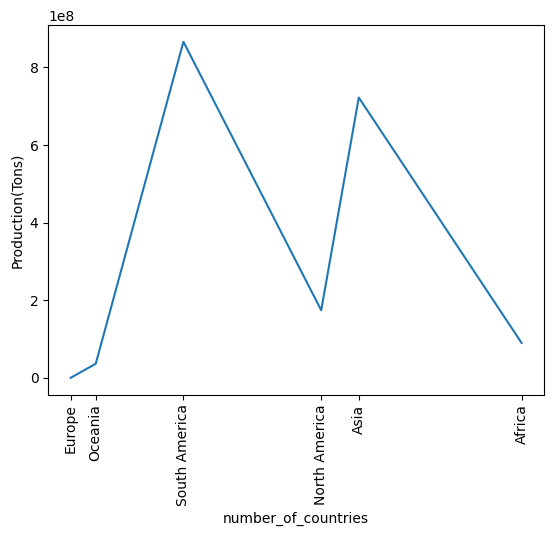

In [243]:
continent_names = df_continent.index.to_list()
sns.lineplot(data=df_continent,x = "number_of_countries",y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"],continent_names,rotation=90)
plt.show()

4. Do continent with highest land produces more sugarcane?

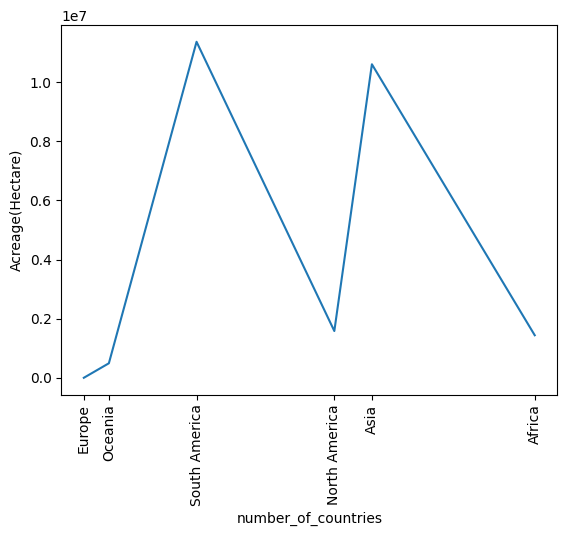

In [244]:
continent_names = df_continent.index.to_list() # check all 
sns.lineplot(data=df_continent,x ="number_of_countries",y="Acreage(Hectare)")
plt.xticks(df_continent["number_of_countries"],continent_names,rotation=90)
plt.show()

Production distribution by continent?

<Axes: ylabel='Production(Tons)'>

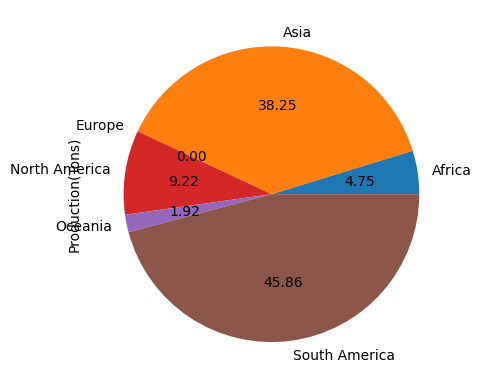

In [245]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

6. Correlation for continent

In [246]:
import numpy as np

In [247]:
numeric_df = df_continent.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


### **Key Insights from Global Sugarcane Production Analysis**  ####

Our data-driven exploration of **global sugarcane production** uncovers distinct strengths across continents and countries, highlighting variations in **scale, efficiency, and specialization**.  

#### **Continental Dominance**  
- **Asia** leads in total production, driven by a large number of producing countries.  
- **South America** achieves the highest **average production per country**, excelling in large-scale farming.  
- **Africa** has many producers but operates at a lower scale, indicating **future growth potential**.  

##### **Country-Specific Excellence**  
- **Brazil** dominates in both **total production and land area**, demonstrating large-scale efficiency.  
- **Paraguay** leads in **production per capita**, reflecting a strong agricultural economy.  
- **Guatemala** achieves the **highest yield per hectare**, showcasing advanced farming techniques.  

##### **Efficiency Patterns & Regional Specialization**  
- **North America** excels in **yield efficiency**, optimizing production per unit area.  
- **South America** leads in **large-scale farming**, leveraging vast land resources.  
- **Asia** thrives through **diverse production**, benefiting from a high number of producing nations.  
- **Africa** is an **emerging force**, with room for agricultural advancements.  

##### **Key Takeaways & Future Potential**  
- **Brazil** remains the global leader in **total output and land utilization**.  
- **Guatemala’s yield efficiency** highlights precision farming and optimized techniques.  
- **Paraguay’s high per-person production** reflects a strong reliance on agriculture.  

**Conclusion**: A Data-Backed Perspective on Global Sugarcane Trends**  
Different regions adopt distinct strategies:  
- **Scale**: Brazil leads in total production and land usage.  
- **Efficiency**: Guatemala maximizes output per hectare.  
- **Per-Capita Focus**: Paraguay ensures high agricultural contribution per person.  

This analysis not only provides insights into current production trends but also serves as a foundation for **strategic agricultural improvements**, especially in emerging markets.